# T2.4 Regressió logística

# Índex

1. Codificació one-hot i distribució categòrica
2. Model probabilístic de classificació amb softmax
3. Regressió logística

# 1 Codificació one-hot i distribució categòrica

**Variable categòrica:** $\;$ variable aleatòria que pren un valor d'un conjunt finit de categories (no ordenades)

**Exemples de variables categòriques:** $\;$ color RGB, **etiqueta de classe,** paraula d'un vocabulari, etc.

**Codificació one-hot:** $\;$ d'una variable categòrica $y$ que pren un valor entre $C$ possibles, $\,\{1,\dotsc,C\}$
$$\operatorname{one-hot}(y)%
=\boldsymbol{y}%
=\begin{pmatrix}y_1\\\vdots\\y_C\end{pmatrix}%
=\begin{pmatrix}\mathbb{I}(y=1)\\\vdots\\\mathbb{I}(y=C)\end{pmatrix}\in\{0,1\}^C%
\quad\text{amb}\quad%
\sum_c y_c=1$$

**Distribució categòrica:** $\;$ distribució de probabilitats entre les $C$ possibles categories d'una variable categòrica, les probabilitats de les quals venen donades per un vector paràmetres $\,\boldsymbol{\theta}\in[0,1]^C\,$ tal que $\,\sum_c\theta_c=1$
$$\operatorname{Cat}(y\mid\boldsymbol{\theta})=\prod_{c=1}^C\theta_c^{\mathbb{I}(y=c)}%
\qquad\text{o, en notació one-hot,}\qquad%
\operatorname{Cat}(\boldsymbol{y}\mid\boldsymbol{\theta})=\prod_{c=1}^C\theta_c^{y_c}$$

**Convenció:** $\;0^0=1\;$ i $\;0\log 0=0;\;$ per exemple, amb $\,\boldsymbol{\theta}=(0.5, 0.5, 0)^t,\,\operatorname{Cat}(\boldsymbol{y}=(1,0,0)^t\mid\boldsymbol{\theta})=0.5^10.5^00^0=0.5$

# 2 Model probabilístic de classificació amb softmax

**Normalització probabilística de classificadors:** $\;$ tot classificador definit amb funcions discriminants generals pot representar-se mitjançant un classificador equivalent amb funcions discriminants normalitzades probabilísticament
$$\begin{align*}
c(\boldsymbol{x})%
&=\operatorname*{argmax}\limits_c\;a_c && \text{on $\,a_c\,$ és la discriminant de la classe $c$ avaluada a $\boldsymbol{x}$}\\%
&=\operatorname*{argmax}\limits_c\;e^{a_c} && \text{amb}\;h(z)=e^z\in\mathbb{R}^{\geq 0}\;\text{estrictament creixent}\\%
&=\operatorname*{argmax}\limits_c\;\frac{e^{a_c}}{\sum_{c'} e^{a_{c'}}} && \text{amb}\;h(z)=kz,\,k\;\text{constant positiva (invariable amb $c$)}%
\end{align*}$$

**La funció softmax:** $\;$ transforma un vector de **logits** (log-probabilitats no normalitzades) $\,\boldsymbol{a}\in\mathbb{R}^C\,$ en un de probabilitats $[0,1]^C$
$$\mathcal{S}(\boldsymbol{a})=\left[%
\frac{e^{a_1}}{\sum_{\tilde{c}}e^{a_{\tilde{c}}}},\dotsc,%
\frac{e^{a_C}}{\sum_{\tilde{c}}e^{a_{\tilde{c}}}}\right]%
\qquad\text{complint-se}\qquad%
0\leq\mathcal{S}(\boldsymbol{a})_c\leq 1%
\quad\text{i}\quad%
\sum_c \mathcal{S}(\boldsymbol{a})_c=1$$

**Model probabilístic de classificació amb softmax:** $\;$ en comptes de predir una única classe més probable, predim les probabilitats de totes les classes a partir d'una funció predictora de logits, $\,f:\mathcal{X}\to\mathbb{R}^C,\,$ governada per un vector de paràmetres $\,\boldsymbol{\theta}$
$$p(\boldsymbol{y}\mid\boldsymbol{x},\boldsymbol{\theta})%
=\operatorname{Cat}(\boldsymbol{y}\mid\mathcal{S}(f(\boldsymbol{x};\boldsymbol{\theta})))%
=\prod_c(\mathcal{S}(f(\boldsymbol{x};\boldsymbol{\theta}))_c)^{y_c}$$

**Conveniència del model en inferència:** $\;$ la predicció de les probabilitats de totes les classes permet aplicar regles més generals que la MAP, per exemple en cas d'errors amb costs diferents; a més, si volem aplicar la regla MAP, no cal softmax-normalitzar logits

**Conveniència del model en aprenentatge:** $\;$ permet plantejar l'aprenentatge probabilísticament, amb criteris estàndard com ara màxima versemblança; a més, gràcies a la softmax, $\,f(\boldsymbol{x};\boldsymbol{\theta})\,$
pot triar-se lliurement ja que no està subjecta a les restriccions de probabilitat

# 3 Regressió logística

**Regressió logística:** $\;$ model amb softmax i **logits lineals** amb l'entrada (en notació homogènia)
$$p(\boldsymbol{y}\mid\boldsymbol{x},\mathbf{W})%
=\operatorname{Cat}(\boldsymbol{y}\mid\mathcal{S}(\boldsymbol{a}))%
\quad\text{amb}\quad%
\boldsymbol{a}=f(\boldsymbol{x};\mathbf{W})=\mathbf{W}^t\boldsymbol{x},\quad%
\mathbf{W}\in\mathbb{R}^{D\times C}\quad\text{i}\quad\boldsymbol{x}\in\mathbb{R}^D$$

**Diferència amb els classificadors (basats en discriminants) lineals:** $\;$ regressió logística prediu les probabilitats de totes les classes

**Exemple (cont. de Perceptró):** $\quad C=D=2,\quad a_1=g_1(x_1,x_2)=-x_1-x_2+1,\quad a_2=g_2(x_1,x_2)=x_1+x_2-1$
$$\boldsymbol{a}=f(\boldsymbol{x};\mathbf{W})=\mathbf{W}^t\boldsymbol{x}%
\quad\text{amb}\quad%
\mathbf{W}^t=\begin{pmatrix}1&-1&-1\\-1&1&1\end{pmatrix}%
\quad\text{i}\quad%
\boldsymbol{x}=\begin{pmatrix}1\\x_1\\x_2\end{pmatrix}$$

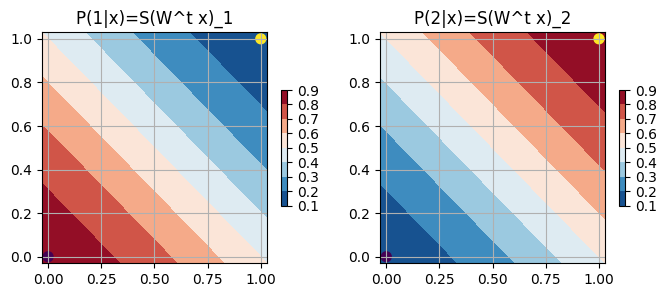

In [1]:
import numpy as np; import matplotlib.pyplot as plt
X = np.array([[0, 0], [1, 1]]).astype(float); y = np.array([1, 2]).astype(int)
x1, x2 = np.meshgrid(np.linspace(-.03, 1.03, 50), np.linspace(-.03, 1.03, 50))
XX = np.c_[np.ravel(x1), np.ravel(x2)]
Wt = np.array([[1, -1, -1], [-1, 1, 1]]).astype(float)
P = lambda x: (np.exp(Wt[0, 0] + Wt[0, 1:] @ x), np.exp(Wt[1, 0] + Wt[1, 1:] @ x))
PP = np.apply_along_axis(P, 1, XX); PP = PP/PP.sum(axis=1, keepdims=True)
_, axs = plt.subplots(1, 2, figsize=(8, 3))
for i, ax in enumerate(axs.flat):
    ax.grid(); ax.set_title(f'P({i+1}|x)=S(W^t x)_{i+1}')
    cp = ax.contourf(x1, x2, PP[:, i].reshape(x1.shape), 7, cmap='RdBu_r')
    plt.colorbar(cp, ax=ax, shrink=0.5); ax.scatter(*X.T, c=y, s=50);